## Budget vs Revenue

Does a greater budget generate a greater profit?

Importing necessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as scs
import warnings
import statsmodels.api as sm


Importing necessary data

In [2]:
movies_budget = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
movies_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


# Turning String Values into Integers

In [3]:
# creates a production column int column
production_budget = [] 

for budget in movies_budget['production_budget']:
    budget = int(budget[1:].replace(",", ""))
    production_budget.append(budget)
    
movies_budget['production_budgetINT'] = production_budget

In [4]:
# creates a domestic gross int column
domestic_gross = [] 

for gross in movies_budget['domestic_gross']:
    gross = int(gross[1:].replace(",", ""))
    domestic_gross.append(gross)
    
movies_budget['domestic_grossINT'] = domestic_gross

In [5]:
# creates a worldwide gross int column
worldwide_gross = [] 

for gross in movies_budget['worldwide_gross']:
    gross = int(gross[1:].replace(",", ""))
    worldwide_gross.append(gross)
    
movies_budget['worldwide_grossINT'] = worldwide_gross

Removing all movies with a worldwide gross of 0 these.

In [6]:
movies_budget = movies_budget[movies_budget.worldwide_grossINT > 0]

In [7]:
movies_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,production_budgetINT,domestic_grossINT,worldwide_grossINT
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",317000000,620181382,1316721747
...,...,...,...,...,...,...,...,...,...
5775,76,"May 26, 2006",Cavite,"$7,000","$70,071","$71,644",7000,70071,71644
5776,77,"Dec 31, 2004",The Mongol King,"$7,000",$900,$900,7000,900,900
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495",6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338",5000,1338,1338


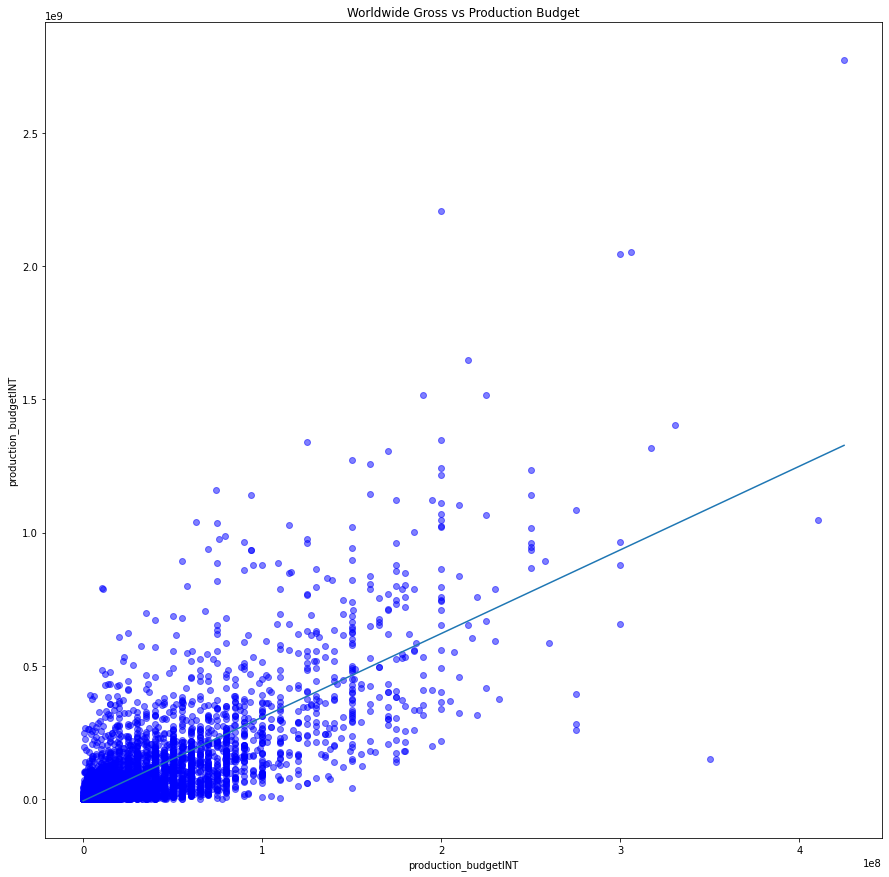

In [22]:
fig = plt.subplots(figsize=(15, 15))
x = movies_budget['production_budgetINT']
 
y = movies_budget['worldwide_grossINT']

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.title('Worldwide Gross vs Production Budget')

plt.xlabel('production_budgetINT')
plt.ylabel('production_budgetINT')

plt.scatter(x, y, c ="blue", alpha = .5)
plt.plot(x, p(x))

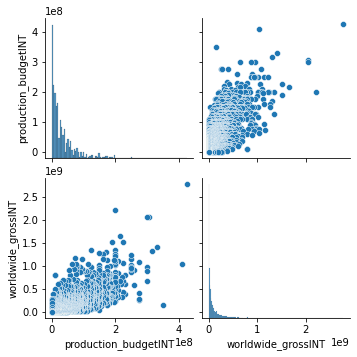

In [12]:
sns.pairplot(movies_budget[['production_budgetINT','worldwide_grossINT']])

In [13]:
lm = sm.OLS.from_formula('worldwide_grossINT ~ production_budgetINT',data = movies_budget)
result = lm.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:     worldwide_grossINT   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     6793.
Date:                Thu, 28 Jul 2022   Prob (F-statistic):               0.00
Time:                        19:27:54   Log-Likelihood:            -1.0838e+05
No. Observations:                5415   AIC:                         2.168e+05
Df Residuals:                    5413   BIC:                         2.168e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -6.915e+06 

## Conclusion